In [4]:
import matplotlib.pyplot as plt
import numpy as np


def display_images(images, labels, num_images=5):
    """
    Exibe uma seleção de imagens com rótulos.

    Parâmetros:
    - images (np.array): Array de imagens carregadas como arrays RGB.
    - labels (list): Lista de rótulos associados a cada imagem.
    - num_images (int): Número de imagens para exibir.
    """
    # Escolher o menor valor entre num_images e o número total de imagens disponíveis
    num_images = min(num_images, len(images))

    # Configurando as subplots
    fig, axes = plt.subplots(1, num_images, figsize=(15, 10))  # Ajuste o tamanho conforme necessário

    for i, ax in enumerate(axes):
        # Mostra a imagem i no subplot correspondente
        ax.imshow(images[i])
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')  # Desativa as linhas de eixo

    plt.show()  # Exibe as imagens


# Carregar o arquivo .npz
data = np.load('dataset.npz')

# Acessar os arrays individuais
X_train = data['X_train']  # Carrega o array de imagens de treinamento
y_train = data['y_train']  # Carrega os rótulos de treinamento
X_val = data['X_validation']  # Carrega o array de imagens de validação
y_val = data['y_validation']  # Carrega os rótulos de validação
X_test = data['X_test']  # Carrega o array de imagens de teste
y_test = data['y_test']  # Carrega os rótulos de teste

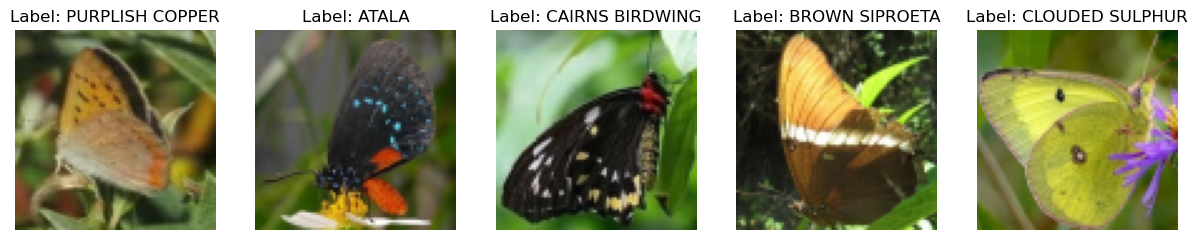

In [5]:
# Exibe as 5 primeiras imagens de treinamento
display_images(X_train, y_train, num_images=5)

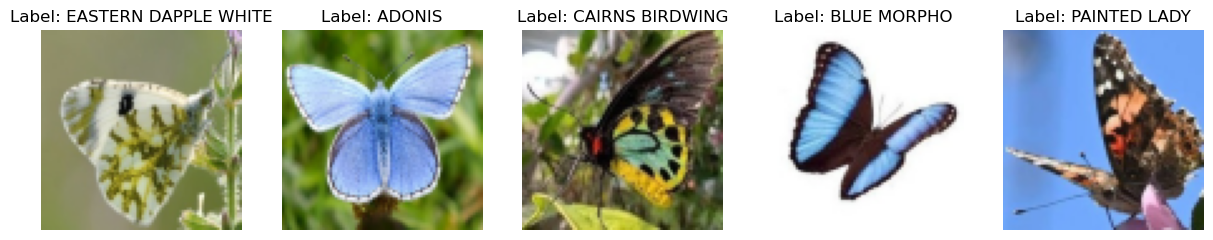

In [6]:
# Exibe as 5 primeiras imagens de teste
display_images(X_test, y_test, num_images=5)

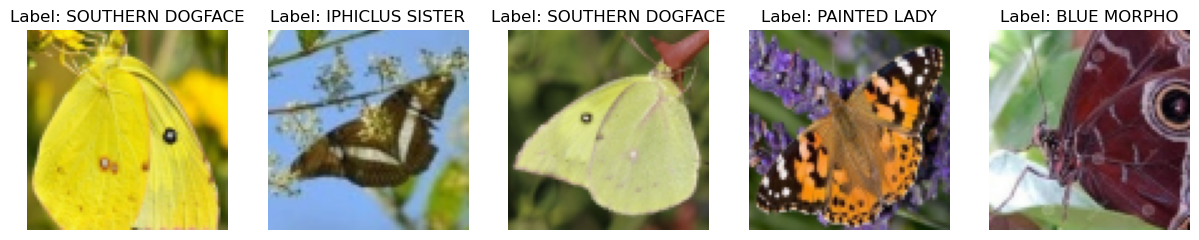

In [7]:
# Exibe as 5 primeiras imagens de validação
display_images(X_val, y_val, num_images=5)

In [8]:
# Informa que existem 450 imagens de teste
# Cada imagem com 80 x 80 pixels
X_test.shape

(450, 80, 80, 3)

# 1 - Redimencione as imagens de treinamento, validação e teste em 75x75 pixels

In [2]:
import numpy as np
import cv2

def resize_images(X, new_size=(75, 75)):
    """
    Redimensiona um array de imagens para o novo tamanho especificado usando OpenCV.

    Parâmetros:
    - X (np.array): Array de imagens (cada imagem deve estar no formato de array de numpy).
    - new_size (tuple): Uma tupla definindo o novo tamanho de imagem (largura, altura).

    Retorna:
    - np.array: Array de imagens redimensionadas.
    """
    resized_images = []
    for img in X:
        # Redimensiona a imagem usando OpenCV
        resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)
        # Adiciona a imagem redimensionada à lista de imagens
        resized_images.append(resized_img)

    return np.array(resized_images)
X_train = resize_images(X_train)
X_val = resize_images(X_val)
X_test = resize_images(X_test)

# 2 - Exiba as imagens de treinamento, validação e teste redimensionadas

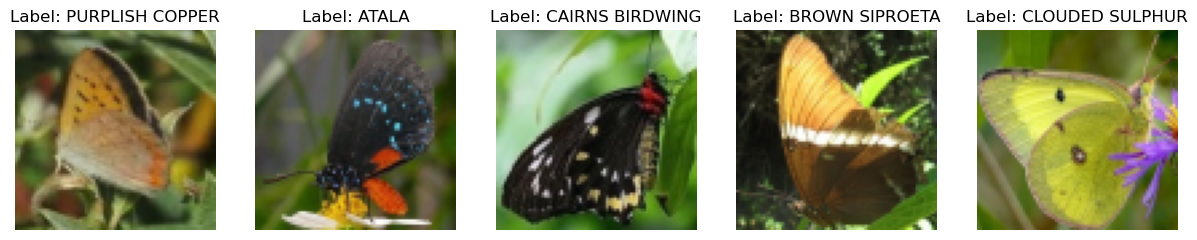

In [7]:
display_images(X_train, y_train, num_images=5)

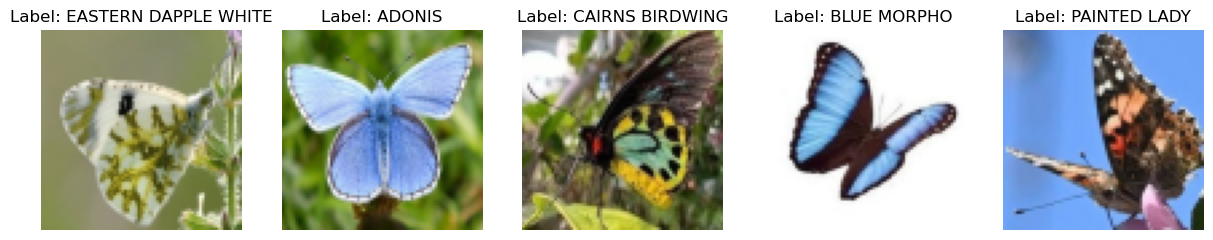

In [8]:
display_images(X_test, y_test, num_images=5)

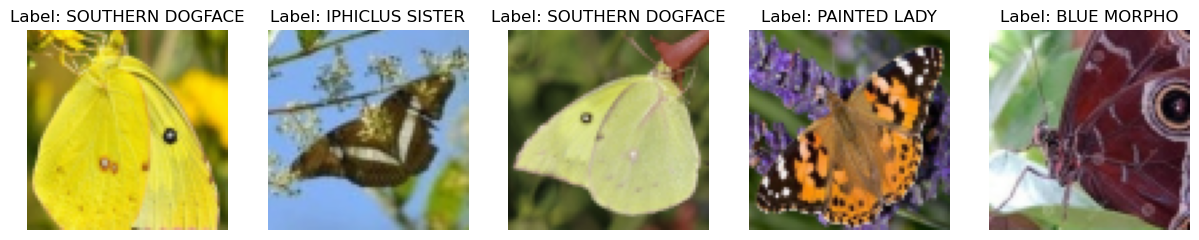

In [9]:
display_images(X_val, y_val, num_images=5)

# 4 - Normalize os dados de treinamento, validação e teste

In [10]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

# 5 - Preparação dos Rótulos (y) para Treinamento de Rede Neural
Atualmente, o array y contém apenas os nomes das imagens. Para o treinamento de uma rede neural, é necessário converter esses rótulos em um formato adequado. Transforme os rótulos de treinamento, validação e teste, que atualmente são apenas nomes das classes de cada imagem, para uma representação numérica ou categórica que possa ser utilizada por uma rede neural.

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Função para converter rótulos em one-hot encodings
def prepare_labels(y):
    """
    Converte rótulos categóricos em one-hot encodings.

    Parâmetros:
    - y (np.array): Array de rótulos categóricos.

    Retorna:
    - np.array: Array de rótulos em formato one-hot encoding.
    """
    # Primeiro, converte rótulos categóricos para inteiros
    label_encoder = LabelEncoder()
    y_integers = label_encoder.fit_transform(y)

    # Depois, converte inteiros para one-hot encoding
    one_hot_encoder = OneHotEncoder(sparse=False)
    y_one_hot = one_hot_encoder.fit_transform(y_integers.reshape(-1, 1))

    return y_one_hot

y_train_encoded = prepare_labels(y_train)
y_val_encoded = prepare_labels(y_val)
y_test_encoded = prepare_labels(y_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# 6 - Definição da Estrutura de Rede Neural Convolucional

Configure a seguinte arquitetura de rede neural convolucional (CNN) para tarefas de classificação:

1. **Primeira Camada Convolucional**: Utilize 60 filtros de tamanho 3x3.
2. **Primeira Camada de MaxPooling**: Aplique max pooling com um filtro de 2x2 para reduzir a dimensionalidade.

3. **Segunda Camada Convolucional**: Empregue 120 filtros de tamanho 3x3.
4. **Segunda Camada de MaxPooling**: Aplique max pooling com um filtro de 2x2.

5. **Terceira Camada Convolucional**: Utilize 240 filtros de tamanho 3x3.
6. **Terceira Camada de MaxPooling**: Aplique max pooling com um filtro de 2x2.

7. **Camada de Achatamento (Flatten)**: Transforme os mapas de características em um vetor unidimensional para as camadas densas.

8. **Camada Densa**: Adicione uma camada densa com 480 neurônios.
9. **Camada de Dropout**: Introduza um dropout de 15% para reduzir o overfitting, desativando aleatoriamente 15% dos neurônios durante o treinamento.

10. **Camada de Saída**: Configure a camada de saída para classificação, com um número de neurônios correspondente ao número de classes e ativação apropriada para classificação (e.g., softmax para multiclasse).

Esta arquitetura é projetada para capturar características hierárquicas das imagens através de múltiplas camadas convolucionais e de pooling, seguidas por camadas densas para a classificação final.


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [22]:
# Criar o modelo sequencial
model = Sequential()

# Primeira Camada Convolucional com 60 filtros de tamanho 3x3
model.add(Conv2D(60, (3, 3), activation='relu', input_shape=(75, 75, 3)))
# Primeira Camada de MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda Camada Convolucional com 120 filtros de tamanho 3x3
model.add(Conv2D(120, (3, 3), activation='relu'))
# Segunda Camada de MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Terceira Camada Convolucional com 120 filtros de tamanho 3x3
model.add(Conv2D(240, (3, 3), activation='relu'))
# Terceira Camada de MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Camada de Achatamento
model.add(Flatten())

# Camada Densa
model.add(Dense(480, activation='relu'))

# Camada de Dropout
model.add(Dropout(0.15))

# Camada de Saída
# Supondo que tenhamos 'n_classes' como número de classes distintas na tarefa de classificação
model.add(Dense(30, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Sumário do modelo
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 73, 73, 60)     │         1,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 34, 34, 120)    │        64,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 17, 120)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 15, 15, 240)    │       259,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 240)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 11760)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 480)            │     5,645,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │        14,430 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,985,750 (22.83 MB)

 Trainable params: 5,985,750 (22.83 MB)

 Non-trainable params: 0 (0.00 B)

# 7 - Configuração de Callbacks para Otimização de Treinamento e Treinamento do Modelo

1. **Early Stopping**: Configure o *early stopping* para interromper o treinamento se a acurácia de validação não melhorar após 10 épocas consecutivas. Isso ajuda a prevenir o overfitting e reduz o tempo de treinamento desnecessário.

2. **Reduce Learning Rate on Plateau**: Implemente a redução do learning rate se a acurácia de validação não melhorar após 3 épocas. O fator de redução deve ser 0.3. Esse método ajusta o learning rate, permitindo refinamentos mais finos nos pesos da rede quando o treinamento parece estagnar.

3. **Treine o modelo**: Realize o treinamento do modelo usando os callbacks definidos por um total de 20 épocas. Salve as métricas ao longo do treinamento.


In [23]:
import tensorflow as tf

# Callback para Early Stopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Monitora a acurácia de validação
    patience=10,             # Número de épocas sem melhoria após o qual o treinamento será interrompido
    verbose=1,               # Para imprimir mensagens quando o callback é acionado
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

# Callback para Reduce Learning Rate on Plateau
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitora a acurácia de validação
    factor=0.3,              # Fator pelo qual o learning rate será reduzido. new_lr = lr * factor
    patience=3,              # Número de épocas sem melhoria após o qual o learning rate será reduzido
    verbose=1                # Para imprimir mensagens quando o callback é acionado
)

# Adicione esses callbacks à sua função de treinamento, por exemplo:
history = model.fit(
    X_train, y_train_encoded,
    epochs=20,
    validation_data=(X_val, y_val_encoded),
    callbacks=[early_stopping_callback, reduce_lr_callback]  # Lista de callbacks
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.0669 - loss: 3.2851 - val_accuracy: 0.3400 - val_loss: 2.3750 - learning_rate: 0.0010
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.3715 - loss: 2.0736 - val_accuracy: 0.4967 - val_loss: 1.6936 - learning_rate: 0.0010
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - accuracy: 0.5965 - loss: 1.3834 - val_accuracy: 0.5667 - val_loss: 1.4985 - learning_rate: 0.0010
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.7056 - loss: 0.8847 - val_accuracy: 0.6033 - val_loss: 1.2361 - learning_rate: 0.0010
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.8304 - loss: 0.5362 - val_accuracy: 0.6400 - val_loss: 1.2668 - learning_rate: 0.0010
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 245ms/step - accuracy: 0.8753 - loss: 0.3908 - val_accuracy: 0.6567 - val_loss: 1.4634 - learning_rate: 0.0010
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - accuracy: 0.9147 - loss: 0.28

# 8 - Visualização de Métricas de Desempenho Durante o Treinamento
Desenvolva um código que gere um gráfico exibindo as curvas de perda (loss) e acurácia tanto para o treinamento quanto para a validação ao longo das épocas. Este gráfico permitirá uma análise visual clara da evolução das métricas, facilitando a identificação de tendências como overfitting ou underfitting e a eficácia dos ajustes realizados nos parâmetros de aprendizado.



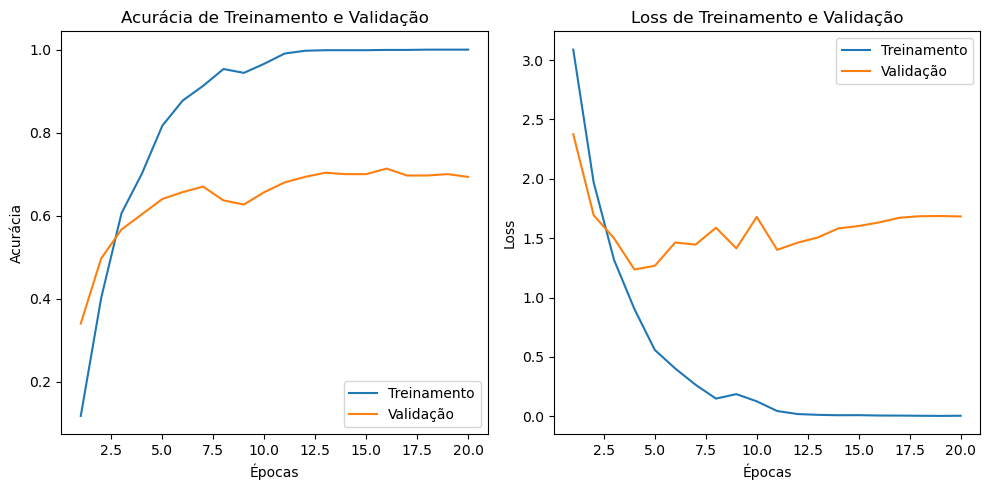

In [24]:
import matplotlib.pyplot as plt

def plot_history(history):
    """
    Plota as curvas de loss e acurácia para treinamento e validação.

    Parâmetros:
    - history: Objeto de retorno do método fit() do Keras, contendo os registros das métricas.
    """

    # Acessa os dados de loss e acurácia do treinamento e validação
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plota a acurácia de treinamento e validação
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Treinamento')
    plt.plot(epochs, val_acc, label='Validação')
    plt.title('Acurácia de Treinamento e Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

    # Plota o loss de treinamento e validação
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Treinamento')
    plt.plot(epochs, val_loss, label='Validação')
    plt.title('Loss de Treinamento e Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

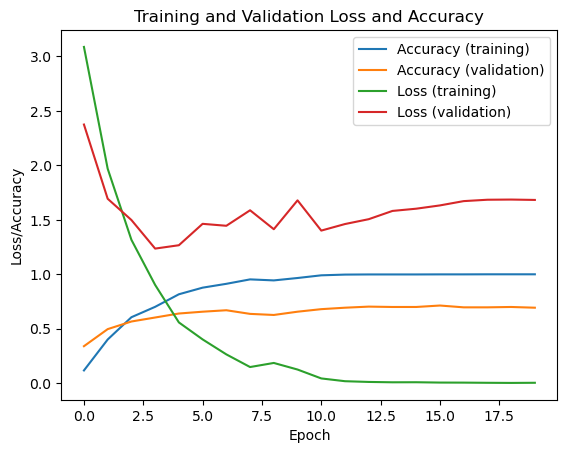

In [30]:
# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy (training)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation)')
plt.plot(history.history['loss'], label='Loss (training)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.title('Training and Validation Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

# 9 - Exiba a acurácia, precisão, recall e F1 score nos dados de treinamento

In [35]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def display_classification_metrics(y_true, y_pred):
    """
    Calcula e exibe métricas de classificação, incluindo acurácia, precisão, recall e F1-score.

    Parâmetros:
    - y_true (array): Array contendo os rótulos verdadeiros.
    - y_pred (array): Array contendo as previsões feitas pelo modelo.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print("Acurácia: {:.2f}%".format(accuracy * 100))
    print("Precisão: {:.2f}%".format(precision * 100))
    print("Recall: {:.2f}%".format(recall * 100))
    print("F1-score: {:.2f}%".format(f1 * 100))

y_pred = np.argmax(model.predict(X_test), axis=1)
# Converter rótulos one-hot de 'y_test' para índices de classe
y_true = np.argmax(y_test_encoded, axis=1)
display_classification_metrics(y_true, y_pred)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Acurácia: 70.00%
Precisão: 70.54%
Recall: 70.00%
F1-score: 69.75%


# 10 - Faça uma matriz de confusão com gráfico de calor
Não precisa exibir com o nome das borboletas

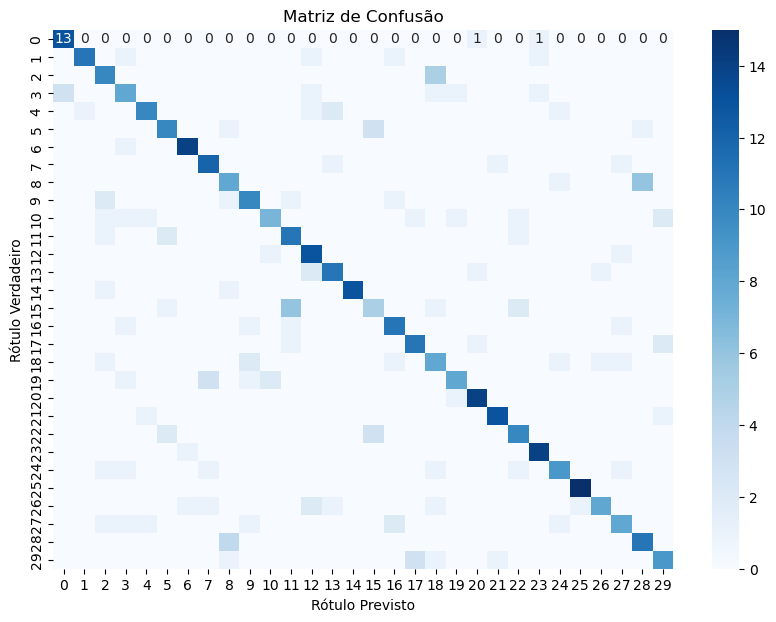

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    """
    Plota a matriz de confusão como um gráfico de calor.

    Parâmetros:
    - y_true (array): Array contendo os rótulos verdadeiros.
    - y_pred (array): Array contendo as previsões feitas pelo modelo.
    """
    # Calcula a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)

    # Cria o gráfico usando seaborn
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusão')
    plt.ylabel('Rótulo Verdadeiro')
    plt.xlabel('Rótulo Previsto')
    plt.show()

plot_confusion_matrix(y_true, y_pred)